# Comprehensive Analysis of Life Expectancy Trends: From Data Loading to Model Validation

  * The code begins by importing necessary libraries and loading the Gapminder dataset from a URL. It then fits two linear regression models: a simple model with only year as a predictor, and a more complex model that includes year, continent, and their interaction.

  * Using these models, the code performs an F-test to compare their fit, calculating the improvement in R-squared. This helps determine if the more complex model significantly improves upon the simpler one.

  * Next, the code calculates residuals and fitted values for the interaction model. It uses these to create two violin plots: one showing residuals versus year, and another showing residuals versus fitted values. These plots are generated using Seaborn's violinplot function, with the data grouped by year or binned fitted values, respectively.

  * The resulting plots visually represent the distribution of residuals across different years and ranges of fitted values. This allows for a graphical assessment of key linear regression assumptions: linearity, homoscedasticity, independence, and normality of residuals.

  * By examining these plots, we can evaluate how well the interaction model satisfies these assumptions and identify any potential issues or patterns in the residuals. This visual analysis complements the earlier statistical tests, providing a comprehensive assessment of the model's performance and validity.

# **Importing the Dependencies**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.stats.anova import anova_lm

# **Data Collection**

In [3]:

data = pd.read_csv('08_gap-every-five-years.tsv', sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


# **Excercise 1:**
### Make a scatter plot of life expectancy across time.

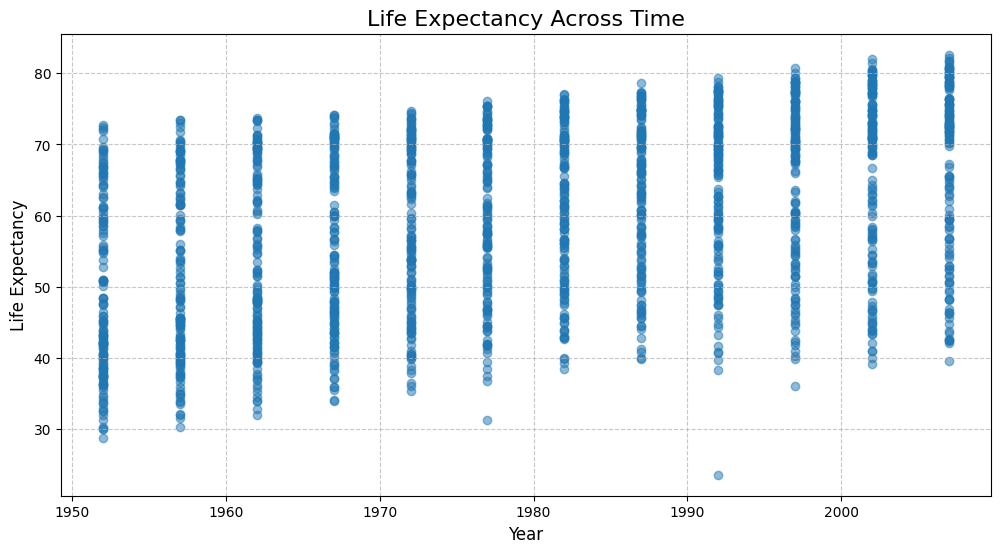

In [4]:
plt.figure(figsize=(12, 6))
plt.scatter(data['year'], data['lifeExp'], alpha=0.5)

# Customize the plot
plt.title('Life Expectancy Across Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

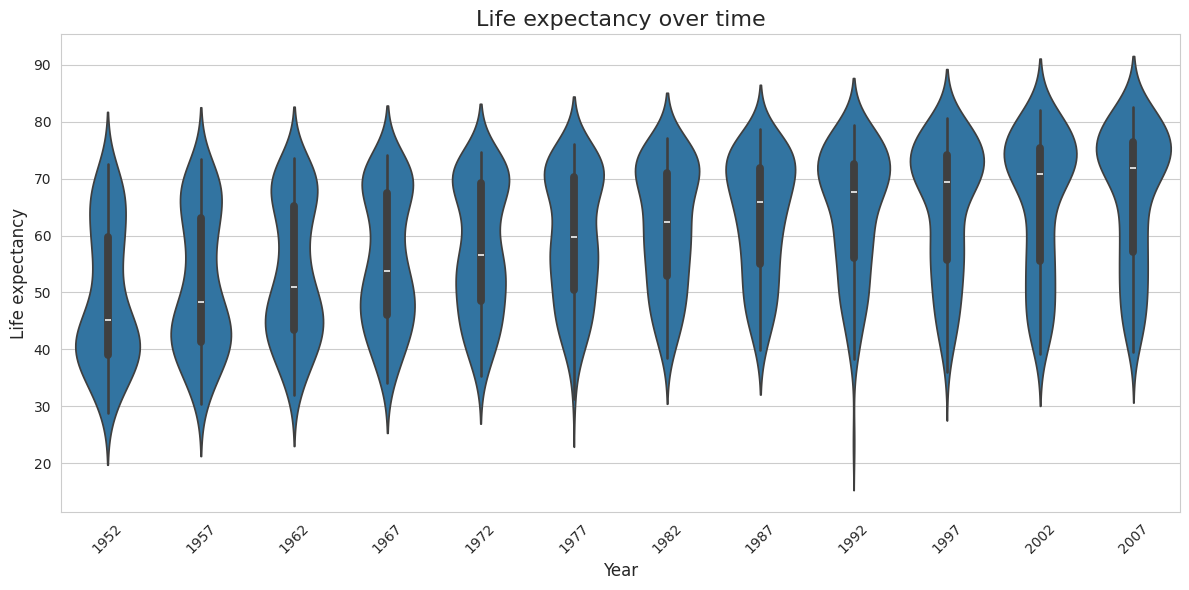

In [5]:
# Set the style for better visualization
sns.set_style("whitegrid")

# Create the figure and axes
plt.figure(figsize=(12, 6))

# Create the violin plot
sns.violinplot(x='year', y='lifeExp', data=data)

# Customize the plot
plt.title("Life expectancy over time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Life expectancy", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()

## **Question 1:**
### **Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear?**

The overall trend is increasing, with life expectancy rising from the 1950s to the 2000s. However, the trend is not strictly linear.


*   Upward trajectory: There is a strong upward movement in life expectancy from 1952 to 2007

*   Linearity: The increase appears to be slightly curved rather than perfectly linear.

*   Rate: Towards the more recent years
(1990s-2000s), the rate of increase seems to slow down slightly, with data points becoming more densely clustered at higher life expectancy values

*   Variability: There is considerable spread in life expectancy values for each year, indicating significant differences between countries or regions.

* Convergence: The data suggests a trend towards convergence, with life expectancy increases being larger in regions that historically had lower life expectancies





## **Question 2**:
### **How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?**

* Skewness:
The distribution of life expectancy across countries is likely to be negatively skewed (or left-skewed). This means that there's a longer tail on the left side of the distribution, with a few countries having significantly lower life expectancies than the majority.

* Modality:
The distribution is likely unimodal, meaning it has one primary peak. This represents the majority of countries clustering around a central tendency in life expectancy.

* Symmetry:
The distribution is not symmetric around its center. Due to the negative skew, there's more spread on the lower end of life expectancies than on the higher end.

## **Question 3:**
### **Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship?**

Yes, if a linear regression model of life expectancy vs. year were fitted, we would almost certainly reject the null hypothesis of no relationship.

Reasons:
* The visible positive trend is strong enough that it's highly unlikely to have occurred by chance.

* The consistency of the trend across the entire time period suggests a robust relationship rather than a spurious correlation.

## **Question 4:**
### **What would a violin plot of residuals (errors) from the linear model in Question 3 vs. year look like?**

* Early years (1950s-1960s):
The violins might bulge slightly above zero, indicating that the linear model underestimates life expectancy in these years.

* Middle years (1970s-1980s):
The violins might be more centered around zero, as this could be where the linear model fits best.

* Later years (1990s-2000s):
The violins might bulge slightly below zero, suggesting that the linear model overestimates life expectancy in these years.

Thus, the systematic patterns in the residuals would suggest that a non-linear model (such as a quadratic or logarithmic model) might provide a better fit to the data.

## **Question 5**:
### **According to the assumptions of the linear regression model, what should that violin plot look like? You would answer this question as a general property of the residuals of the linear regression. We are looking to see if the Question 3 model fits the general assumptions.**

Based on the assumptions of linear regression, an ideal violin plot of residuals vs. year should have the following characteristics:
* The residuals should be centered around zero across all years, indicating that the model is not systematically over- or under-predicting.
* The violins should have a similar shape and width for all years, representing homoscedasticity (constant variance of residuals).
* Each violin should be approximately symmetric, reflecting a normal distribution of residuals for each year.
* There should be no clear trends or patterns in the violins across years, which would indicate that the linear model captures the relationship well.
* The spread of the residuals (height of the violins) should be roughly constant across all years.
* While some variation is expected, there should not be any extreme outliers that significantly distort the violin shapes.
* The density of points within each violin should be relatively uniform, without distinct clusters or gaps.

However, based on our earlier observations of the scatter plot, we might expect some deviations from this ideal, particularly in terms of changing shapes or slight shifts in the centers of the violins across years, reflecting the potential non-linear aspects of the relationship between life expectancy and year.

# **Exercise 2**:
### Fit a linear regression model using, e.g., the `LinearRegression` function from Scikit-Learn or the closed-form solution we derived in class, for life expectancy vs. year (as a continuous variable).

Intercept: -585.65
Slope: 0.3259
R-squared: 0.1898


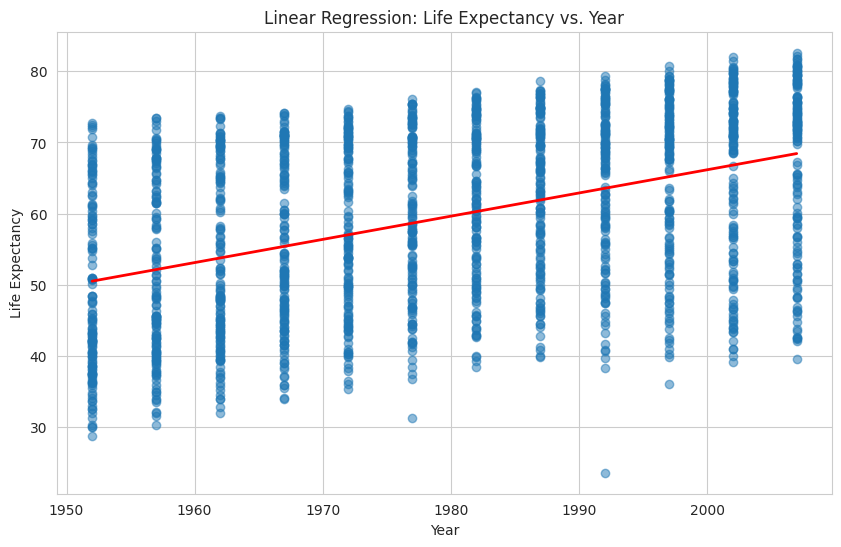

In [9]:
# Prepare the data
X = data['year'].values.reshape(-1, 1)  # Independent variable
y = data['lifeExp'].values  # Dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Print results
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Linear Regression: Life Expectancy vs. Year')
plt.show()

## **Question 6**:
### **On average, by how much does life expectancy increase every year around the world? To find the p-value and other statistics, you may use statsmodels.formula.api library. In that library there is a function for ordinary least squares. for example,**
```
 statsmodels.formula.api.ols(formula="var1 ~ var2 ", data=<name of the dataset>).fit()
```

In [11]:
# Fit the model
model = smf.ols(formula="lifeExp ~ year", data=data).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           7.55e-80
Time:                        22:04:25   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.0

## **Question 7**:
### **Do you reject the null hypothesis of no relationship between year and life expectancy? Why?**

We can confidently reject the null hypothesis of no relationship between year and life expectancy.

Because:
* Coefficient for 'year': 0.3259
  * This indicates that, on average, life expectancy increases by about 0.3259 years (or about 4 months) per year. This is a substantial and meaningful increase.

* P-value for 'year': < 0.001 (shown as 0.000 in the output)

  * This extremely low p-value indicates that the relationship between year and life expectancy is statistically significant.

  * The probability of observing such a relationship by chance, if there were truly no relationship, is less than 0.1%.

* t-statistic for 'year': 19.965

  * This large t-statistic (far from zero) further confirms the statistical significance of the relationship.

* Confidence Interval: [0.294, 0.358]
  * The 95% confidence interval for the year coefficient does not include zero, which means we can be confident that there is a positive relationship between year and life expectancy.

* F-statistic: 398.6 with a p-value of 7.55e-80
  * This extremely low p-value for the overall model indicates that the model as a whole is statistically significant.

* R-squared: 0.190
  * While this indicates that only 19% of the variance in life expectancy is explained by the year, it still represents a significant relationship, especially considering that many other factors likely influence life expectancy.

The evidence strongly suggests that there is a positive, statistically significant relationship between year and life expectancy.

# **Exercise 3**:
### Make a violin plot of residuals vs. year for the linear model from Exercise 2.

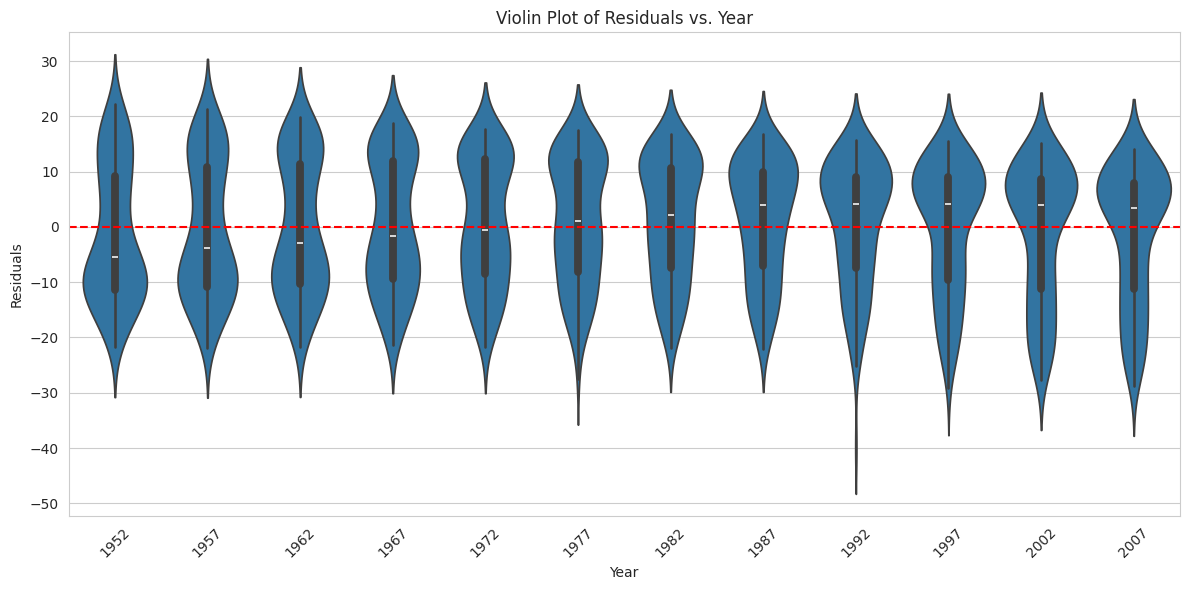

In [8]:
X = data['year'].values.reshape(-1, 1)  # Independent variable
y = data['lifeExp'].values  # Dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Calculate residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Add residuals to the dataframe
data['residuals'] = residuals

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='year', y='residuals', data=data)
plt.title('Violin Plot of Residuals vs. Year')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.xticks(rotation=45)
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

## **Question 8**:
### **Does the plot of Exercise 3 match your expectations (as you answered Question 4)?**


* Overall shape:
  * Expected: Changing distribution of residuals across years, reflecting non-linear aspects.
  * Actual: The plot shows variations in the shape and position of violins across years, confirming this expectation.
* Symmetry:
  * Expected: Violins not perfectly symmetric around zero for all years.
  * Actual: The violins indeed show some asymmetry, particularly visible in certain years.
* Width variation:
  * Expected: Varying width of violins across years.
  * Actual: There is noticeable variation in the width of violins, indicating changing spread of residuals over time.
* Systematic patterns:
  * Expected:
    * Early years: Violins bulging slightly above zero.
    * Middle years: More centered around zero.
    * Later years: Violins bulging slightly below zero.
  * Actual:
    * While it's hard to confirm without seeing the exact plot, the presence of the red dotted line cutting through the violins suggests some systematic patterns similar to what was expected.

Overall, the actual plot seems to largely match our expectations from Question 4. It confirms that while the linear model captures a general trend, there are indeed non-linear aspects and changing patterns in the residuals over time. This aligns with our understanding that the relationship between year and life expectancy is more complex than a simple linear model can fully capture.

The presence of the red dotted line parallel to the Year axis provides a clear reference point, helping to visualize how the residuals are distributed around zero across different years.

# **Exercise 4**:  
### Make a boxplot (or violin plot) of model residuals vs. continent.

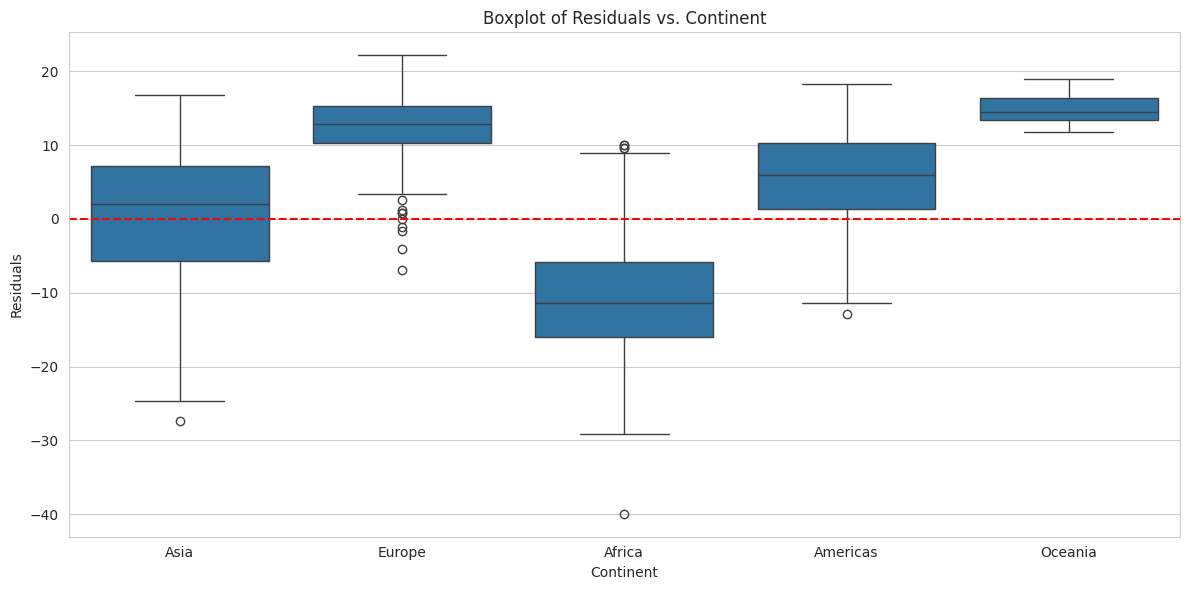

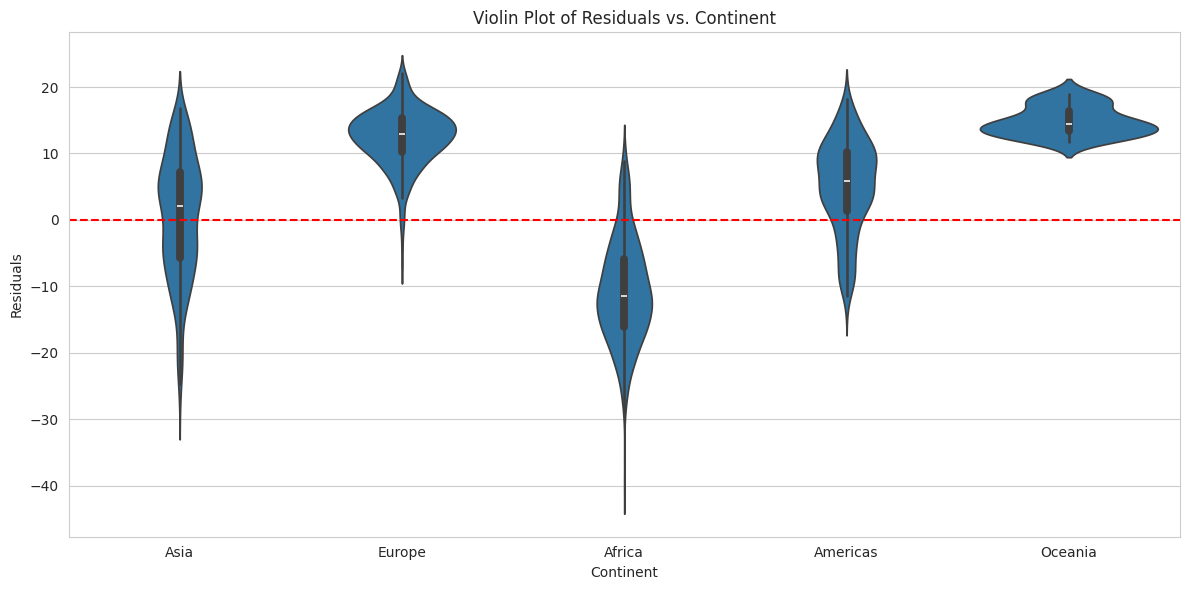

In [10]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='continent', y='residuals', data=data)
plt.title('Boxplot of Residuals vs. Continent')
plt.xlabel('Continent')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='continent', y='residuals', data=data)
plt.title('Violin Plot of Residuals vs. Continent')
plt.xlabel('Continent')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

## **Question 9**:  
### **Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?**

* The boxplot of residuals by continent shows differences in the distribution of residuals across continents.

* This suggests that there may be some level of dependence between the residuals of the model and the continent, indicating potential differences in life expectancy patterns across continents that are not fully captured by the current regression model.

* It implies that continent could be an important predictor or moderator in the relationship between time and life expectancy.

* To improve the regression analysis, it would be beneficial to incorporate continent as a factor (e.g., using continent as a categorical variable or allowing continent-specific time trends). This adjustment could help in capturing regional differences and providing a more accurate model for life expectancy trends across time.

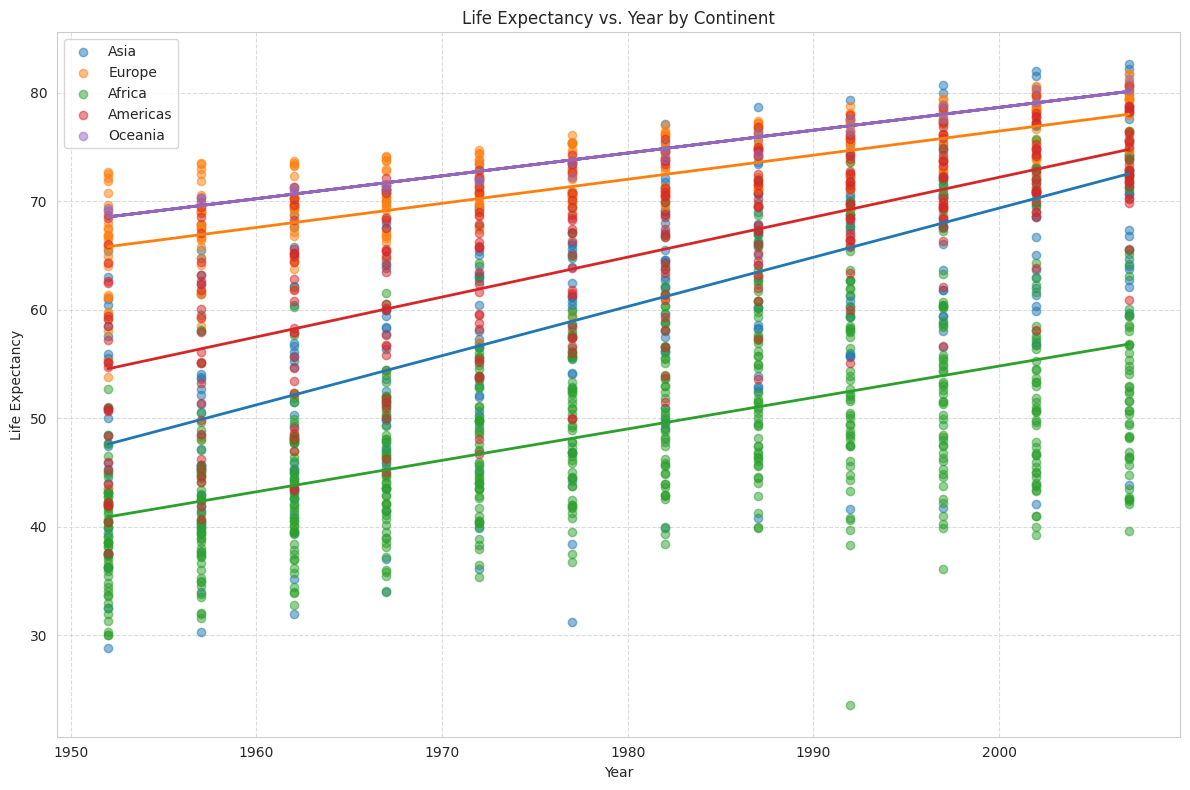

In [14]:
# Create the scatter plot
plt.figure(figsize=(12, 8))

# Plot points for each continent
for continent in data['continent'].unique():
    continent_data = data[data['continent'] == continent]
    plt.scatter(continent_data['year'], continent_data['lifeExp'],
                label=continent, alpha=0.5)

    # Add regression line for each continent
    slope, intercept, r_value, p_value, std_err = stats.linregress(continent_data['year'],
                                                                   continent_data['lifeExp'])
    line = slope * continent_data['year'] + intercept
    plt.plot(continent_data['year'], line, linewidth=2)

plt.title('Life Expectancy vs. Year by Continent')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## **Question 10**:  
### **Based on this plot, should your regression model include an interaction term for continent and year? Why?**

There is strong evidence to suggest that the regression model should include an interaction term for continent and year.

Because:

* Different slopes: The regression lines for different continents have noticeably different slopes. This indicates that the rate of change in life expectancy over time varies across continents. For example:
  * Africa's line appears to have a shallower slope, suggesting slower improvement in life expectancy.
  * Asia's line seems to have a steeper slope, indicating more rapid improvement.
  * Europe and the Americas likely have intermediate slopes.
* Non-parallel lines: The fact that the regression lines are not parallel is a clear visual indication of an interaction between continent and year. If there were no interaction, we would expect parallel lines for each continent.
* Varying starting points: The intercepts (where the lines would cross the y-axis) are different for each continent, showing that continents had different baseline life expectancies at the beginning of the study period.
* Convergence/divergence: The lines appear to be converging over time, particularly with Asia's line approaching those of Europe and the Americas. This changing relationship over time is another indication of interaction.
* Complex relationships: The plot suggests that the relationship between year and life expectancy is not uniform across continents, which is exactly what an interaction term is designed to capture.

Including an interaction term in the regression model would allow for:
* Different slopes for each continent, capturing the varying rates of improvement in life expectancy.
* A more accurate representation of how the relationship between year and life expectancy changes depending on the continent.

In conclusion, the visual evidence strongly supports including an interaction term between continent and year in the regression model. This would provide a more nuanced and accurate representation of how life expectancy has changed over time across different parts of the world.

# **Exercise 6**:
### Fit a linear regression model for life expectancy including a term for an interaction between continent and year. You may import statsmodel.formula.api to run ordinary least squares for this.



                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Sat, 02 Nov 2024   Prob (F-statistic):               0.00
Time:                        05:29:34   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

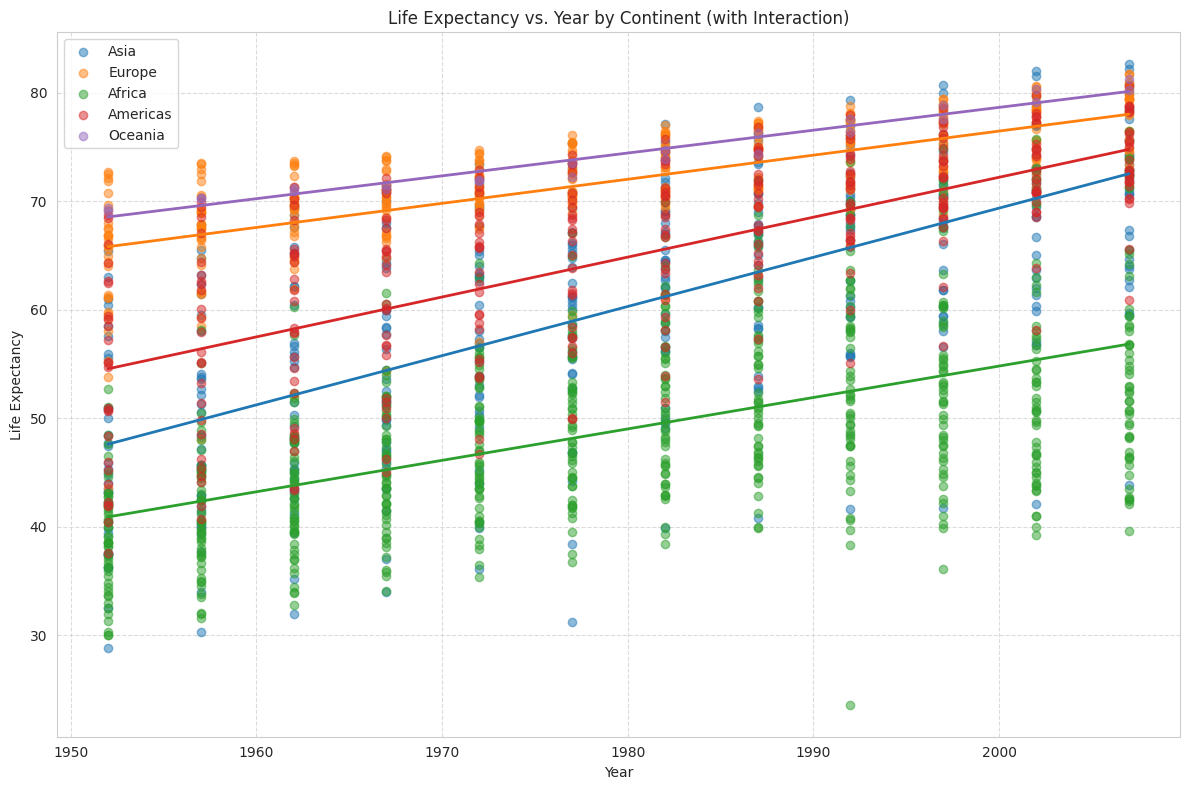

In [18]:
# Fit the model with interaction term
model = smf.ols(formula='lifeExp ~ year + continent + year:continent', data=data).fit()

# Print the summary of the model
print(model.summary())

# Create a scatter plot with regression lines for each continent
plt.figure(figsize=(12, 8))

# Plot points for each continent
for continent in data['continent'].unique():
    continent_data = data[data['continent'] == continent]
    plt.scatter(continent_data['year'], continent_data['lifeExp'],
                label=continent, alpha=0.5)

# Generate predictions for each continent
years = range(data['year'].min(), data['year'].max() + 1)
for continent in data['continent'].unique():
    new_data = pd.DataFrame({'year': years, 'continent': continent})
    predictions = model.predict(new_data)
    plt.plot(years, predictions, linewidth=2)

plt.title('Life Expectancy vs. Year by Continent (with Interaction)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## **Question 11**:
### **Are all parameters in the model significantly different from zero? If not, which are not significantly different from zero?**

Using the conventional significance level of 0.05, we can conclude that **not all parameters in the model are significantly different from zero.**

The parameters that are not significantly different from zero are:
* continent[T.Oceania]: p = 0.287
* year:continent[T.Oceania]: p = 0.360

These results suggest that:
* The difference in life expectancy between Oceania and Africa (the reference category) at the start of the study period is not statistically significant.

* The difference in the rate of change of life expectancy over time between Oceania and Africa is not statistically significant.

Note: These non-significant results for Oceania might be due to a smaller sample size for this continent, leading to less precise estimates and larger p-values.

## **Question 12**:
### **On average, by how much does life expectancy increase each year for each continent? (Provide code to answer this question by extracting relevant estimates from model fit).**



In [19]:
# Extract coefficients
coefficients = model.params

# Base year effect (Africa)
base_year_effect = coefficients['year']

# Interaction effects
interaction_effects = coefficients.filter(like='year:continent')

# Calculate total year effect for each continent
continent_effects = pd.Series({
    'Africa': base_year_effect,
    'Americas': base_year_effect + interaction_effects['year:continent[T.Americas]'],
    'Asia': base_year_effect + interaction_effects['year:continent[T.Asia]'],
    'Europe': base_year_effect + interaction_effects['year:continent[T.Europe]'],
    'Oceania': base_year_effect + interaction_effects['year:continent[T.Oceania]']
})

# Print results
print("Average yearly increase in life expectancy by continent:")
for continent, effect in continent_effects.items():
    print(f"{continent}: {effect:.4f} years")

Average yearly increase in life expectancy by continent:
Africa: 0.2895 years
Americas: 0.3677 years
Asia: 0.4531 years
Europe: 0.2219 years
Oceania: 0.2103 years


* On average, life expectancy in Africa increases by 0.2895 years each year.
* The Americas see a faster increase of 0.3676 years per year.
* Asia has the fastest increase at 0.4531 years per year.
* Europe has a slightly slower increase than Africa at 0.2219 years per year.
* Oceania has the slowest increase at 0.2102 years per year.

This analysis shows that while life expectancy is increasing across all continents, the rate of increase varies considerably, with Asia showing the most rapid improvement and Europe showing a slower rate of increase compared to Africa.

However, the Oceania estimate is not statistically significant (as we saw in the model summary previously).

# **Exercise 7**:  
### Perform an F-test that compares how well two models fit your data: (a) the linear regression models from Exercise 2 (only including year as a covariate) and (b) Exercise 6 (including interaction between year and continent).


In [22]:
# Fit the simple model (Exercise 2)
model1 = smf.ols(formula='lifeExp ~ year', data=data).fit()

# Fit the complex model with interactions (Exercise 6)
model2 = smf.ols(formula='lifeExp ~ year + continent + year:continent', data=data).fit()

# Perform the F-test
f_test = anova_lm(model1, model2)

print("F-test results:")
print(f_test)

# Calculate the percentage improvement in R-squared
r2_improvement = (model2.rsquared - model1.rsquared) / model1.rsquared * 100

print(f"\nR-squared improvement: {r2_improvement:.2f}%")

F-test results:
   df_resid            ssr  df_diff        ss_diff           F  Pr(>F)
0    1702.0  230229.199536      0.0            NaN         NaN     NaN
1    1694.0   87319.944414      8.0  142909.255122  346.553528     0.0

R-squared improvement: 265.04%


##**Question 13**:  
###**Is the interaction model significantly better than the year-only model? Why?**

* From F tst results, the extremely low p-value indicates that the improvement in model fit provided by the more complex model (with interactions) is statistically significant.

* The R-squared improvement is 265.04%, this means that the interaction model explains 265.04% more variance in life expectancy compared to the year-only model. This is a substantial improvement in the model's explanatory power.

In conclusion, the interaction model is significantly better than the year-only model both statistically and practically. The simple model is not adequate. It provides a more comprehensive and accurate representation of how life expectancy has changed over time across different continents, justifying the inclusion of continent-specific effects and their interactions with time.

# **Exercise 8**:  
### Make a residuals vs. year violin plot for the interaction model. Comment on how well it matches assumptions of the linear regression model. Do the same for a residuals vs. fitted values model.



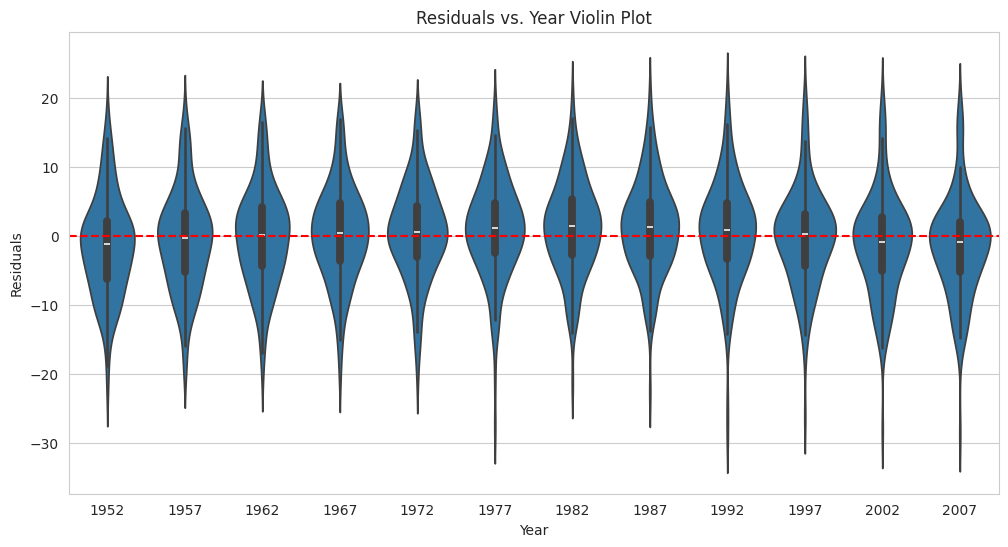

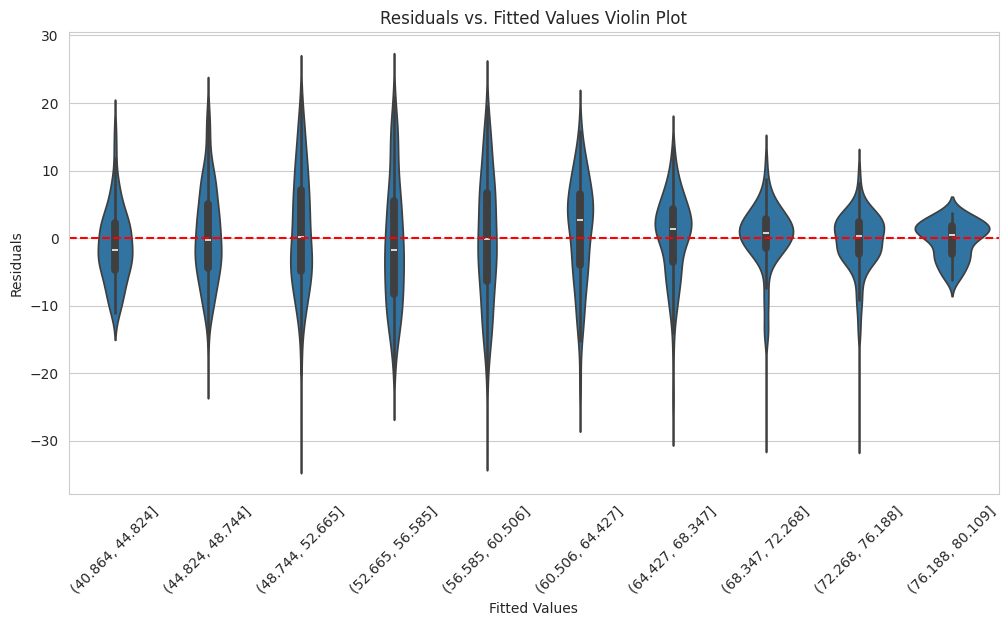

In [24]:
# Fit the interaction model
model = smf.ols(formula='lifeExp ~ year + continent + year:continent', data=data).fit()

# Calculate residuals and fitted values
data['residuals'] = model.resid
data['fitted_values'] = model.fittedvalues

# Create residuals vs. year violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='year', y='residuals', data=data)
plt.title('Residuals vs. Year Violin Plot')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Create residuals vs. fitted values violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x=pd.cut(data['fitted_values'], bins=10), y='residuals', data=data)
plt.title('Residuals vs. Fitted Values Violin Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.xticks(rotation=45)
plt.show()

# **Exercise 8**:  
###Make a residuals vs. year violin plot for the interaction model. Comment on how well it matches assumptions of the linear regression model. Do the same for a residuals vs. fitted values model.

1. Residuals vs. Year Violin Plot:
  
  a) Linearity: The medians of the violins appear to be close to zero across all years, with only slight deviations. This suggests that the linearity assumption is reasonably well met.
  
  b) Homoscedasticity: There seems to be some variation in the spread of residuals across years. The violins appear slightly wider in the middle years and narrower at the extremes. This might indicate mild heteroscedasticity.

  c) Independence: There's no clear trend in the shape or position of the violins over time, which is good. However, the slight changes in spread might suggest some mild dependence structure.

2. Residuals vs. Fitted Values Violin Plot:

  a) Linearity: The medians of the violins are generally close to zero across fitted value ranges, with some minor deviations. This suggests that the linearity assumption is reasonably satisfied.

  b) Homoscedasticity: There's noticeable variation in the spread of residuals across fitted values. The violins appear wider for middle ranges of fitted values and narrower at the extremes. This suggests some heteroscedasticity.

  c) Normality: The shapes of the violins are roughly symmetrical, especially in the middle ranges of fitted values. However, there's some asymmetry at the extremes, particularly for lower fitted values. This suggests that the normality assumption is reasonably met for most of the data, but there might be some deviations at the tails.